## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. If you're inspired to dig deeper, click the blue "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

There is 1 csv file in the current version of the dataset:


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [3]:
# Histogram of column data
def plotHistogram(df, nHistogramShown, nHistogramPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nHistRow = (nCol + nHistogramPerRow - 1) / nHistogramPerRow
    plt.figure(num=None, figsize=(6*nHistogramPerRow, 8*nHistRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nHistogramShown)):
        plt.subplot(nHistRow, nHistogramPerRow, i+1)
        df.iloc[:,i].hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: ../input/Dataset-Unicauca-Version2-87Atts.csv

In [4]:
df = pd.read_csv('Dataset-Unicauca-Version2-87Atts.csv', delimiter=',')
df.dataframeName = 'Dataset-Unicauca-Version2-87Atts.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 3577296 rows and 87 columns


In [37]:
df.isna().sum()

Flow.ID                        0
Source.IP                      0
Source.Port                    0
Destination.IP                 0
Destination.Port               0
Protocol                       0
Timestamp                      0
Flow.Duration                  0
Total.Fwd.Packets              0
Total.Backward.Packets         0
Total.Length.of.Fwd.Packets    0
Total.Length.of.Bwd.Packets    0
Fwd.Packet.Length.Max          0
Fwd.Packet.Length.Min          0
Fwd.Packet.Length.Mean         0
Fwd.Packet.Length.Std          0
Bwd.Packet.Length.Max          0
Bwd.Packet.Length.Min          0
Bwd.Packet.Length.Mean         0
Bwd.Packet.Length.Std          0
Flow.Bytes.s                   0
Flow.Packets.s                 0
Flow.IAT.Mean                  0
Flow.IAT.Std                   0
Flow.IAT.Max                   0
Flow.IAT.Min                   0
Fwd.IAT.Total                  0
Fwd.IAT.Mean                   0
Fwd.IAT.Std                    0
Fwd.IAT.Max                    0
Fwd.IAT.Mi

In [40]:
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

# we will not select the column Label because al values are `BENIGN`
X = df.iloc[:,:84]
Y = df['L7Protocol']
Y

0          131
1          131
2            7
3            7
4          131
5          131
6          131
7          130
8           91
9          126
10         131
11         131
12         131
13         131
14         131
15          91
16           7
17           7
18           7
19         126
20         126
21           7
22           7
23           7
24         126
25           7
26          91
27         131
28         131
29         130
30           7
31           7
32           7
33           7
34           7
35         131
36         124
37         124
38         124
39         130
40         131
41           7
42           7
43         130
44           7
45          91
46           7
47         131
48          91
49          91
50         130
51         130
52         131
53           7
54         131
55           7
56           7
57           7
58           7
59           7
60           7
61           7
62         131
63           7
64           7
65         130
66        

Let's take a quick look at what the data looks like:

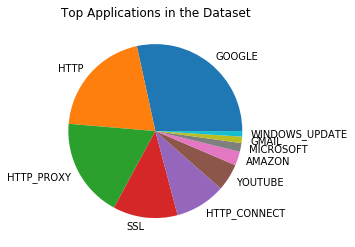

In [55]:
protocol_name = df['ProtocolName'].value_counts(ascending=False)[:10]
names, count = protocol_name.index.values, protocol_name.values
plt.pie(count, labels=names);
plt.title("Top Applications in the Dataset");

Histogram of sampled columns:

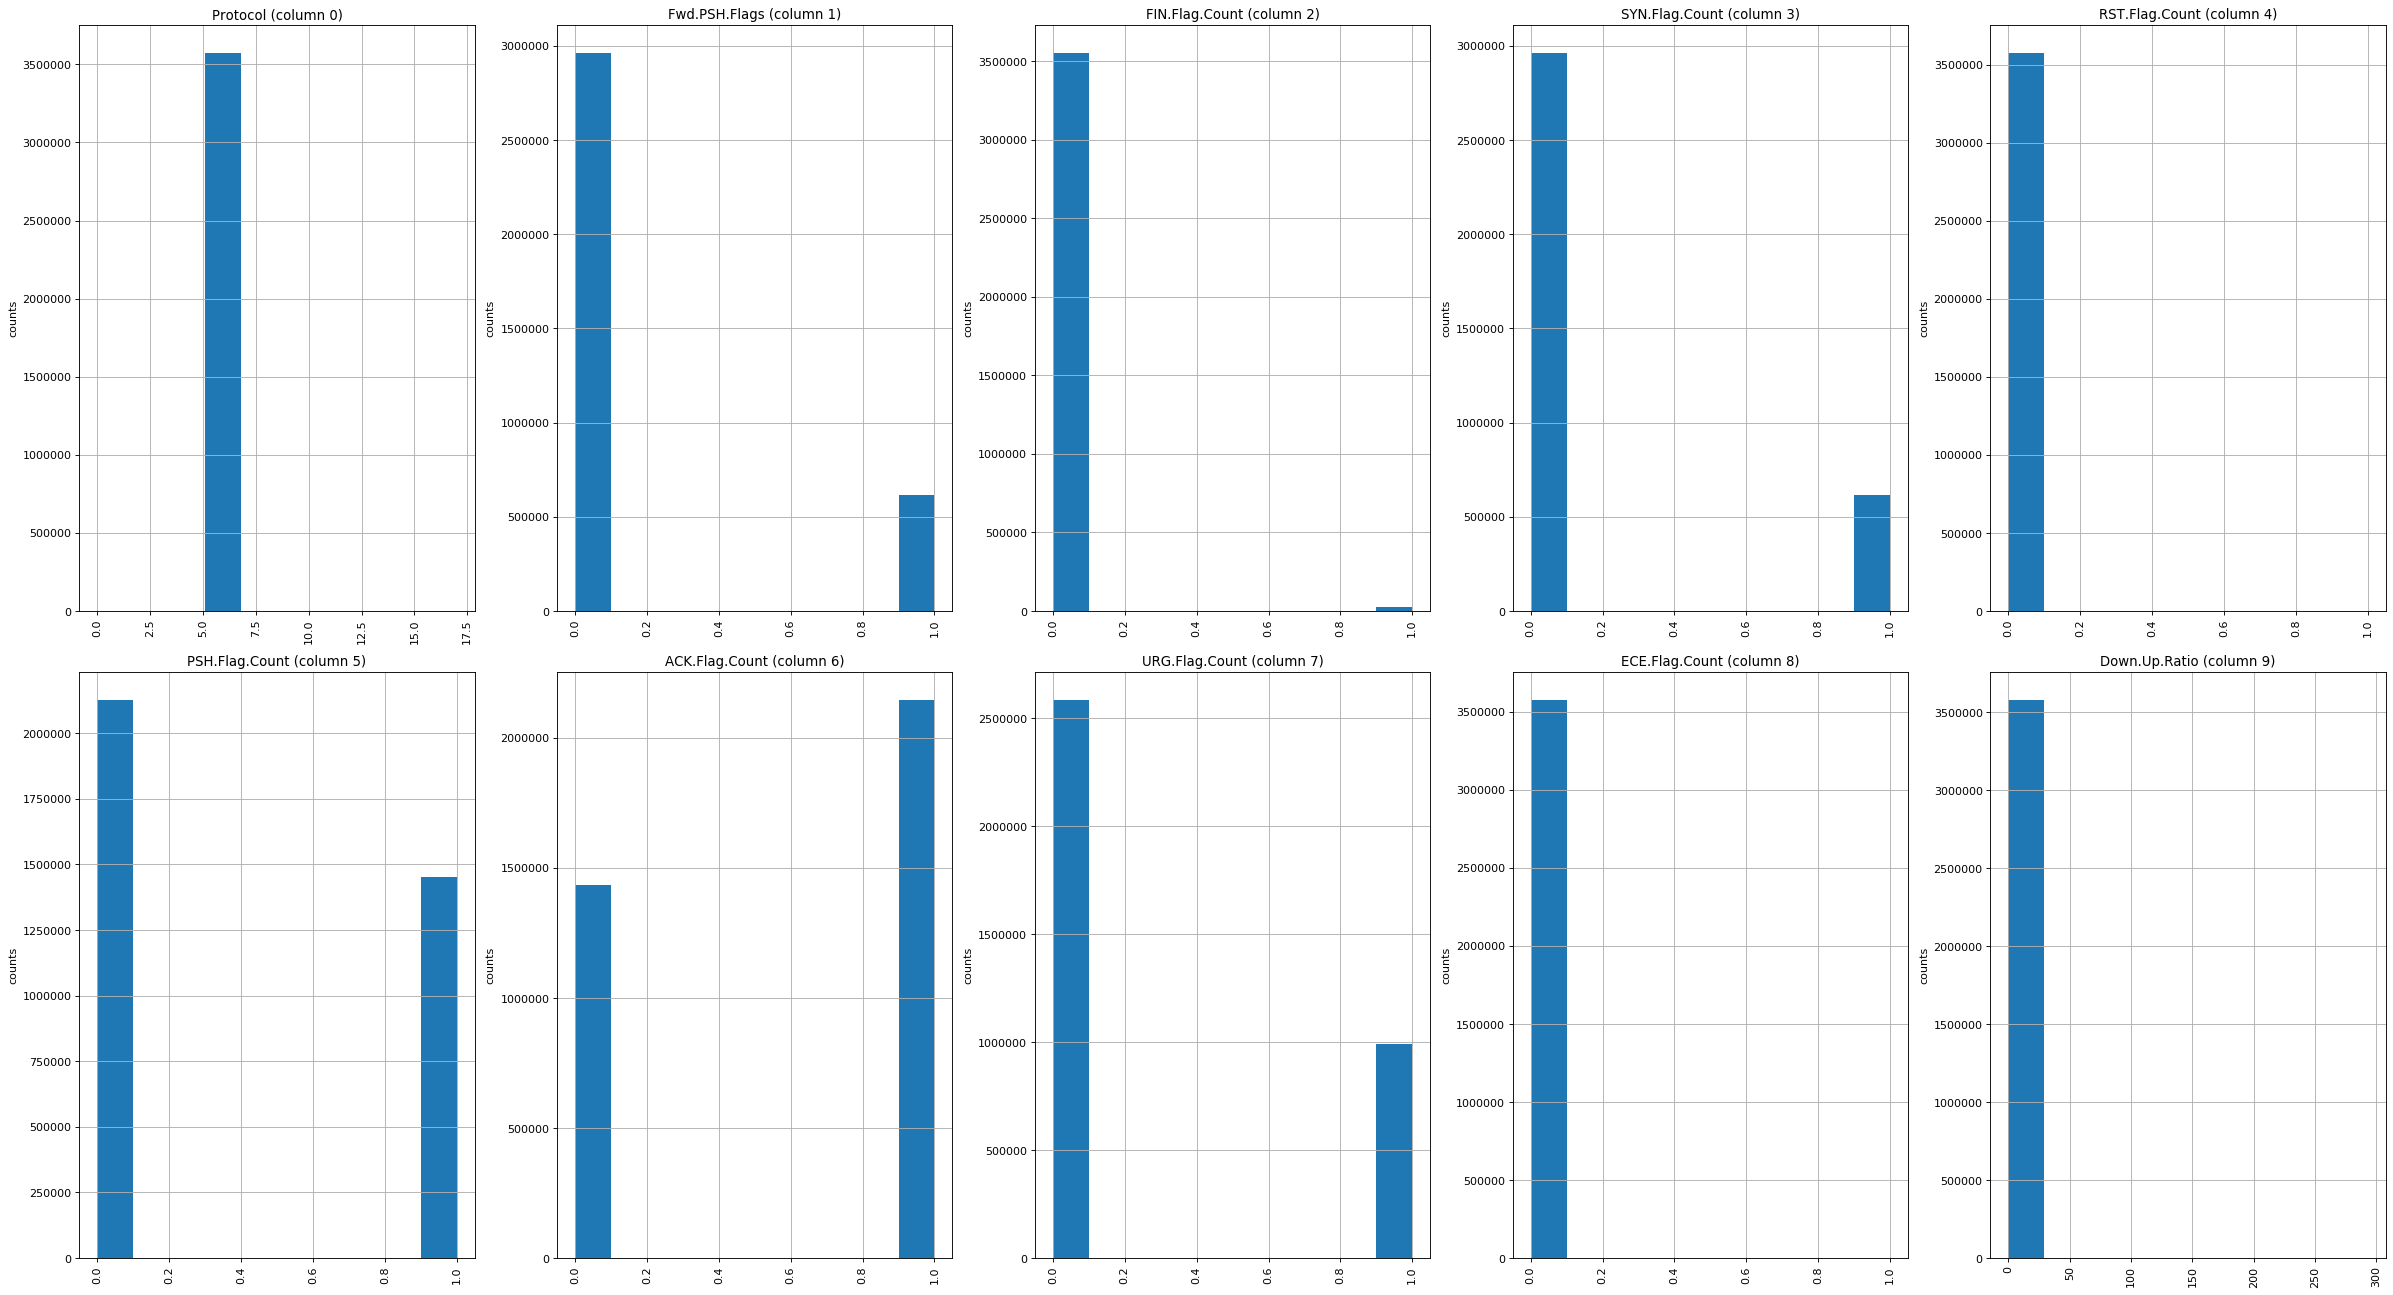

In [56]:
plotHistogram(df, 10, 5)

Correlation matrix:

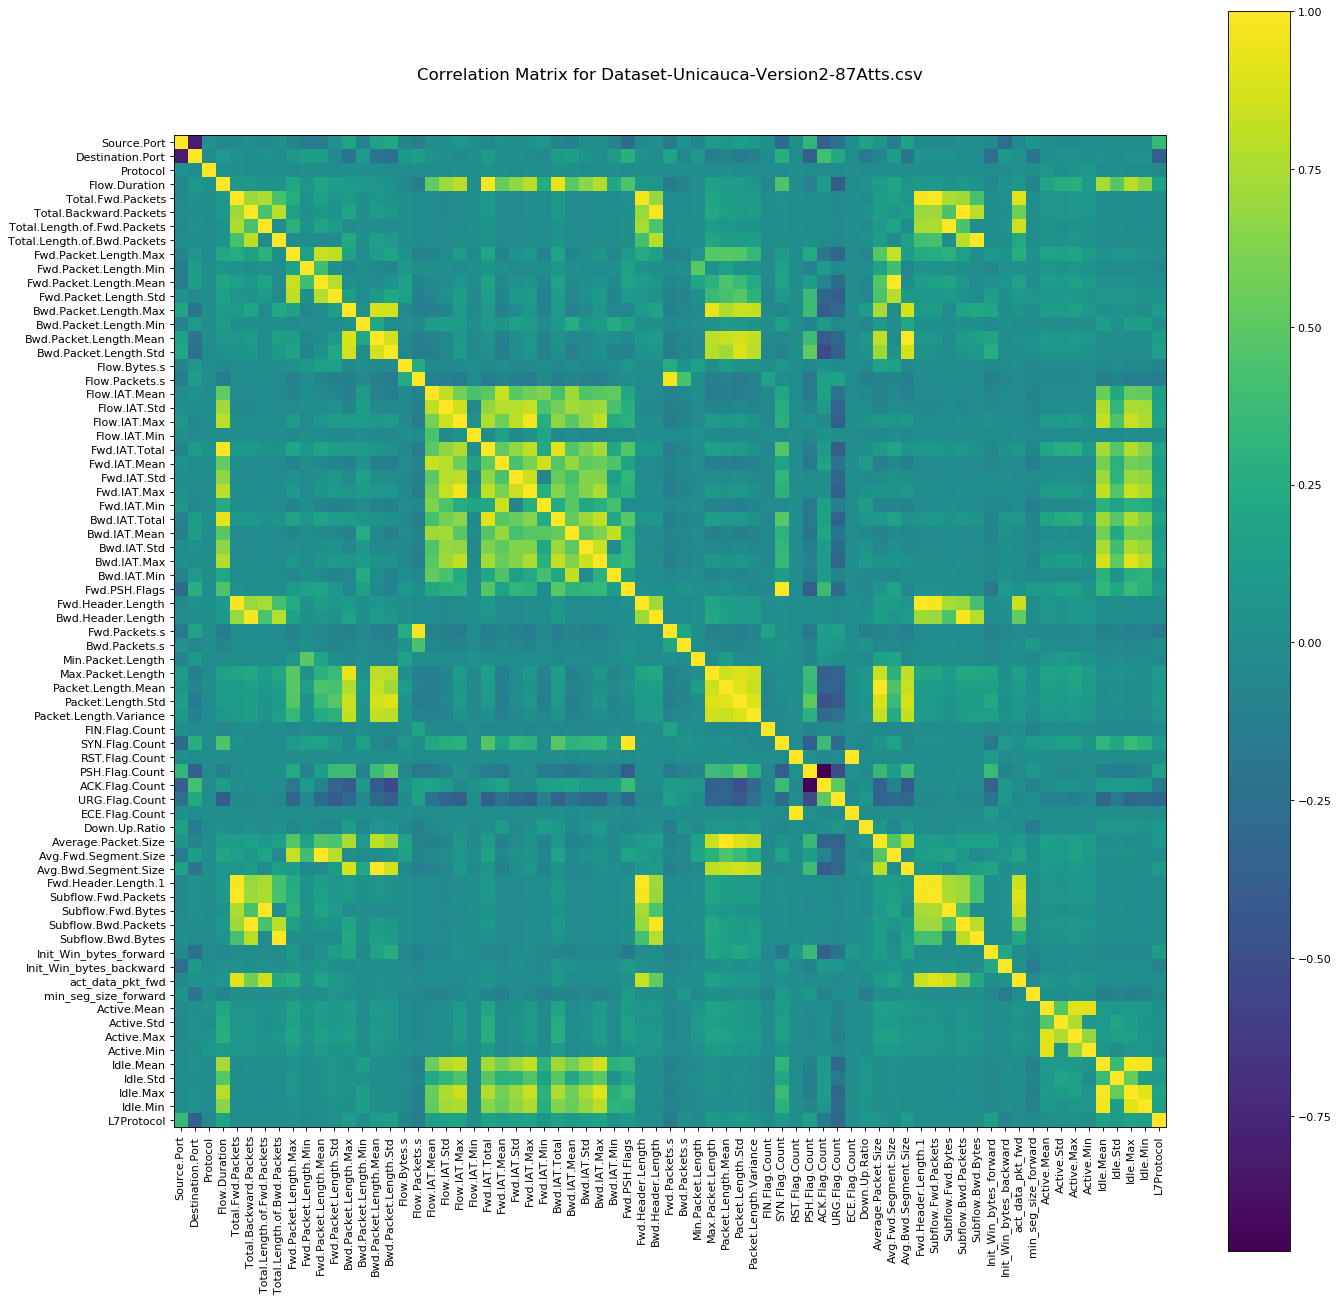

In [57]:
plotCorrelationMatrix(df, 20)

In [41]:
def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x
theils_u = theils_u(X, Y)

NameError: name 'conditional_entropy' is not defined

Scatter and density plots:

In [59]:
plotScatterMatrix(df, 20, 10)

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb37788f840> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fb37789d378> (for post_execute):


KeyboardInterrupt: 

## Conclusion
This concludes your starter analysis! To go forward from here, click the blue "Fork Notebook" button at the top of this kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!